In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv


--2025-09-30 13:12:16--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.04s   

2025-09-30 13:12:16 (18.7 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [2]:
import pandas as pd
import numpy as np

In [35]:
cols = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

In [36]:
df = pd.read_csv('car_fuel_efficiency.csv')
df = df[cols]

<Axes: >

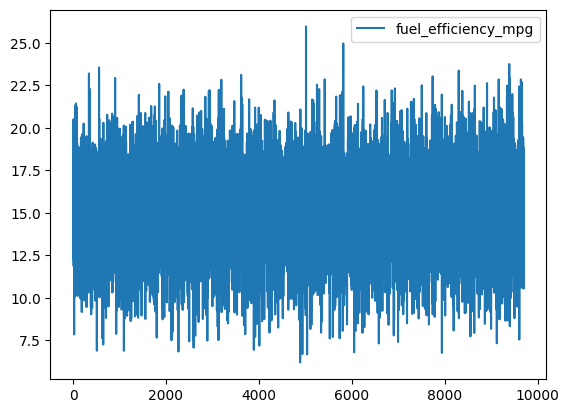

In [37]:
df[cols[-1:]].plot()

In [38]:
df.isna().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [39]:
df['horsepower'].median()

149.0

In [40]:
df['horsepower'].describe()

,horsepower
count,8996.000000
mean,149.657292
std,29.879555
min,37.000000
25%,130.000000
50%,149.000000
75%,170.000000
max,271.000000


In [41]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [42]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [43]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
#np.log1p(
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_train_zero = df_train.copy()
df_val_zero = df_val.copy()
df_test_zero = df_test.copy()


for df in [df_train_zero,df_val_zero, df_test_zero]:
  df['horsepower'] = df['horsepower'].fillna(0)


for df in [df_train,df_val, df_test]:
  df['horsepower'] = df['horsepower'].fillna(df_train['horsepower'].mean())

In [44]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [45]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [46]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [47]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [48]:
w0_zero, w_zero = train_linear_regression(df_train_zero.values, y_train)
w0, w = train_linear_regression(df_train.values, y_train)

In [49]:
y_pred_zero = w0_zero + df_val_zero.dot(w_zero)
y_pred = w0 + df_val.dot(w)

In [50]:
rmse_zero = rmse(y_val, y_pred_zero)
rmse_val = rmse(y_val,y_pred)

In [51]:
print(round(rmse_zero,2),round(rmse_val,2)) #RMSE

0.52 0.46


In [52]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [53]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
  w0, w = train_linear_regression_reg(df_train_zero.values, y_train, r=r)
  y_pred = w0 + df_val_zero.dot(w)
  rmse_val = rmse(y_val,y_pred)
  print(r,round(rmse_val,2))

0 0.52
0.01 0.52
0.1 0.52
1 0.52
5 0.52
10 0.52
100 0.52


In [27]:
results = {}
for i in range(10):
  df = pd.read_csv('car_fuel_efficiency.csv')
  df = df[cols]
  idx = np.arange(n)

  np.random.seed(i)
  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]

  y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
  y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
  y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

  del df_train['fuel_efficiency_mpg']
  del df_val['fuel_efficiency_mpg']
  del df_test['fuel_efficiency_mpg']

  df_train_zero = df_train.copy()
  df_val_zero = df_val.copy()
  df_test_zero = df_test.copy()


  for df in [df_train_zero,df_val_zero, df_test_zero]:
    df['horsepower'] = df['horsepower'].fillna(0)

  w0_zero, w_zero = train_linear_regression(df_train_zero.values, y_train)
  y_pred_zero = w0_zero + df_val_zero.dot(w_zero)
  rmse_zero = rmse(y_val, y_pred_zero)
  results[i] = rmse_zero

In [28]:
std = np.std(list(results.values()))

In [29]:
round(std,3)

np.float64(0.001)

In [32]:
df = pd.read_csv('car_fuel_efficiency.csv')
df = df[cols]
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_train = pd.concat([df_train,df_val])
df_test = df.iloc[idx[n_train+n_val:]]

y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_train_zero = df_train.copy()
df_test_zero = df_test.copy()


for df in [df_train_zero, df_test_zero]:
  df['horsepower'] = df['horsepower'].fillna(0)

w0_zero, w_zero = train_linear_regression_reg(df_train_zero.values, y_train, r = 0.001)
y_pred_zero = w0_zero + df_test_zero.dot(w_zero)
rmse_zero = rmse(y_test, y_pred_zero)

In [33]:
print(rmse_zero)

0.5156261299169602
